# The art of "data poetry"

**_Definition:_** Data science is the art of being able to discover the story that your data tells. Data science sits at the intersection of several fields, including statistics, machine learning, computer science, and graphic visualization. The aim of data science is to to develop a holistic understanding of the story that your data tells and be able to share that story most efficiently to the rest of the world.

In order to apply data scinece tools appropriately to psychology and neuroscience research, you'll want to follow some basic rules. (Note: Some of these rules are borrowed from here: http://dataconomy.com/2017/07/10-rules-results-data-science/).


<br>
<br>$$"Data\ Science\ is\ for\ insight.$$ <br>
$$Machine\ Learning\ is\ for\ prediction.$$ <br>
$$Artificial\ Intelligence\ is\ for\ control."$$ <br>
$$- Somewhere\ on\ the\ internet.$$
<br>
<br>

# Rule 1: Keep track of every result produced.

Data science is fundamentally the process of exploring your data. While most people think that this just means clever programming and applying cool machine learning tools, the most fundamental part of data science is chronicling your journey. Data exploration is messy and many times requires exploring many dead ends. Thus the single most important thing that you can do is __document everything you do!__

This is the reason you'll be learning to use markdown documents like Jupyter notebooks. These tools allow for you to integrate text (and equations!) with your analysis code, like this...


Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

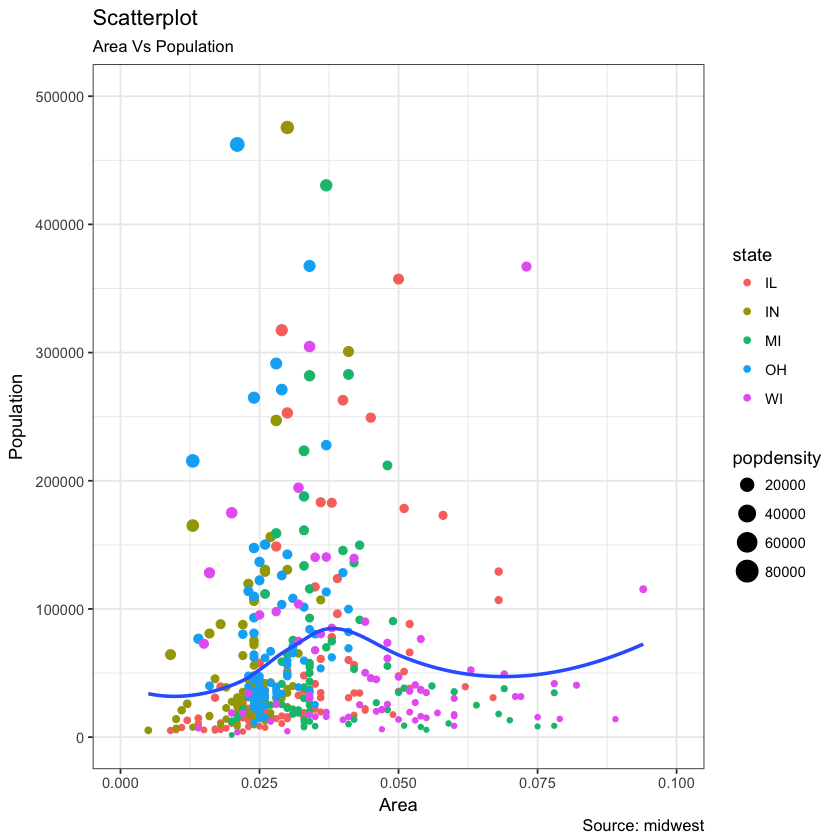

In [2]:
#install.packages("ggplot2")
# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

It's like having your lab notebook hooked up directly to your analysis scripts. You can try different analysis experiments. Record your thoughts and explain why you decide to try something else.

Think of Jupyter notebooks as an updated version of your lab notebook. You can verbally document your ideas and then show what happens when you test them out.

As the course goes on you will learn how to balance documentation in text cells like this cell here, with inline comments in your code. Both are useful tools, but serve different purposes.

### Subrule 1.1: Every detail matters
In this class you will be using the statistical package R. But do you know what version of R? (Well yes, it's in the syllabus. It's a rhetorical question).

You will always want to document exactly what versions of everything you do.

For example, the for the examples here, I'm using:
    * R version 3.4.3 (2017-11-30)
    * Jupyter Notebook Server 5.1.0
    
You'd want this information at the very beginning of everything you do. It matters.



# Rule 2: If you're doing things by hand, then you're doing them wrong.

A common rookie mistake every scientist makes is to rely on entering, updating, or fixing their data files by hand.

<br>
$$DO$$

<br>
$$NOT$$

<br>
$$DO\ THIS!$$

<br>
Note that this violates Rule #1. If you manually manipulate your data files, then you likely aren't going to document exactly what you did. 

"But what if I discover a simple error in my data file? Can't I just open it up in Excel and fix the error?"

If you're a good data scientist, the answer to that would be "no". Instead, get into the habit of thinking that "raw means raw". So in this case you'll have two versions of your data file. 
  1. An untouched data file that you can always go back to, but reflects the data as you got it. 
  2. Preprocessing scripts that correct errors and save a new working data file.

# Rule 3: Always have a data plan

<br>

Playing with code and data can be a lot of fun. I mean, doing stuff like this is cool right???



The downloaded binary packages are in
	/var/folders/hn/77llg_f95zlg9ftwmt7m88hr0000gp/T//RtmpPU5vnF/downloaded_packages


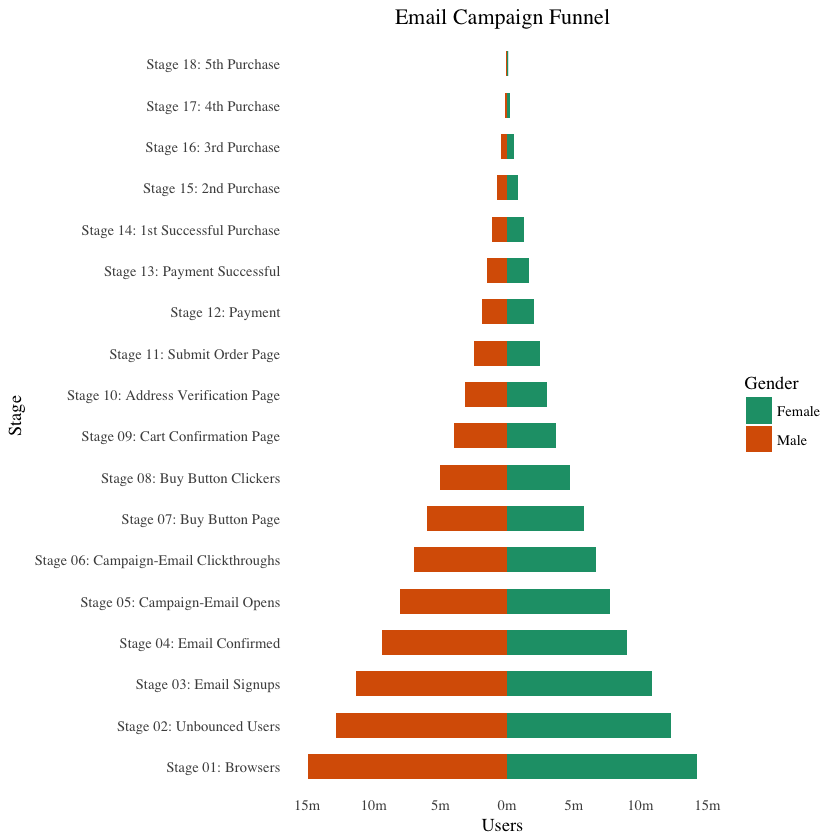

In [4]:
#library(ggplot2)
install.packages("ggthemes")
library(ggthemes)
options(scipen = 999)  # turns of scientific notations like 1e+40

# Read data
email_campaign_funnel <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# X Axis Breaks and Labels 
brks <- seq(-15000000, 15000000, 5000000)
lbls = paste0(as.character(c(seq(15, 0, -5), seq(5, 15, 5))), "m")

# Plot
ggplot(email_campaign_funnel, aes(x = Stage, y = Users, fill = Gender)) +   # Fill column
                              geom_bar(stat = "identity", width = .6) +   # draw the bars
                              scale_y_continuous(breaks = brks,   # Breaks
                                                 labels = lbls) + # Labels
                              coord_flip() +  # Flip axes
                              labs(title="Email Campaign Funnel") +
                              theme_tufte() +  # Tufte theme from ggfortify
                              theme(plot.title = element_text(hjust = .5), 
                                    axis.ticks = element_blank()) +   # Centre plot title
                              scale_fill_brewer(palette = "Dark2")  # Color palette

But the brilliance of a good analysis routine is its simplicity, not the pretty picture at the end.

<br>
So before doing a single line of data analysis, you want to develop a game plan. Use a whiteboard. Use a chalkboard. Draw it with crayons on a wall. Or just write it out in your Jupyter notebook. Whatever works best for you. But always have a plan before you start to explore your data.

<br>
Playing with the logic of your analysis and spending time planning how to do your analysis will save you time and stress in the long run.

# Rule 4: A picture is worth 1000 statistical tests.

<br>
Along with statistics and data management, data visualization is at the heart of data science. But visualizing data is a tricky art. You want to balance __simplicity__ and __accuracy__ with __maximizing the amount of information you can convey__.

<br>
Take an example of plotting means. A bar plot can easily convey the numbers...


Var1,Freq
audi,18
chevrolet,19
dodge,37
ford,25
honda,9
hyundai,14


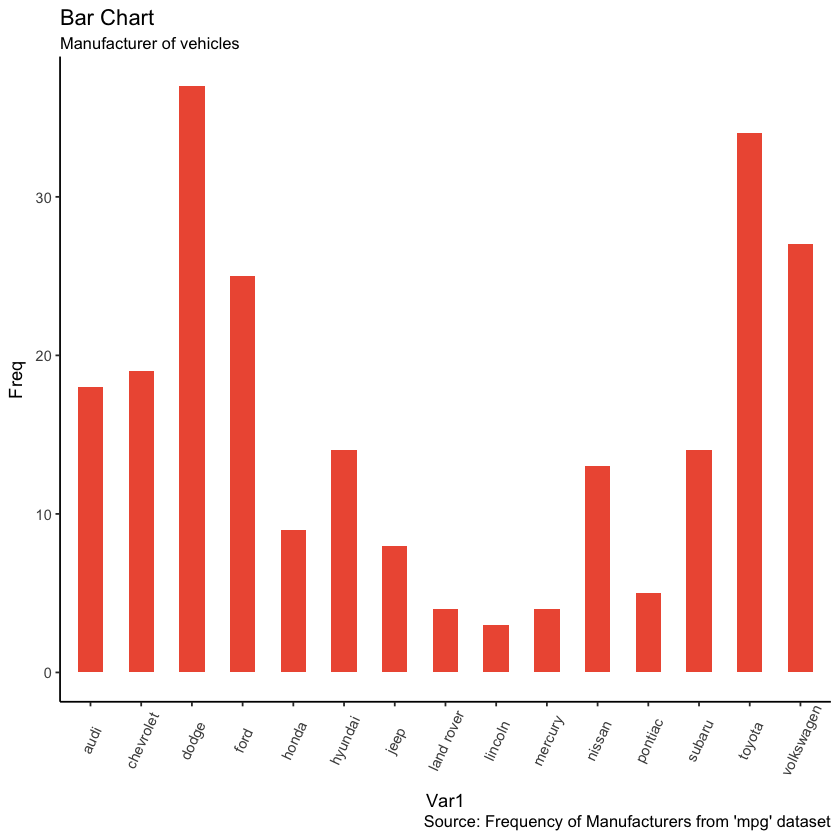

In [4]:
# prep frequency table
freqtable <- table(mpg$manufacturer)
df <- as.data.frame.table(freqtable)
head(df)
#>          Var1 Freq
#> 1        audi   18
#> 2   chevrolet   19
#> 3       dodge   37
#> 4        ford   25
#> 5       honda    9
#> 6     hyundai   14

# plot
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(df, aes(Var1, Freq))
g + geom_bar(stat="identity", width = 0.5, fill="tomato2") + 
      labs(title="Bar Chart", 
           subtitle="Manufacturer of vehicles", 
           caption="Source: Frequency of Manufacturers from 'mpg' dataset") +
      theme(axis.text.x = element_text(angle=65, vjust=0.6))

However, you lose information about variance. You could add errorbars but errorbars are problematic too as they can hide the real pattern of variance in your data.

<br>
So consider better ways of visualizing your data that capture the nuance in a simple and clear manner. (Say something like violin plots).

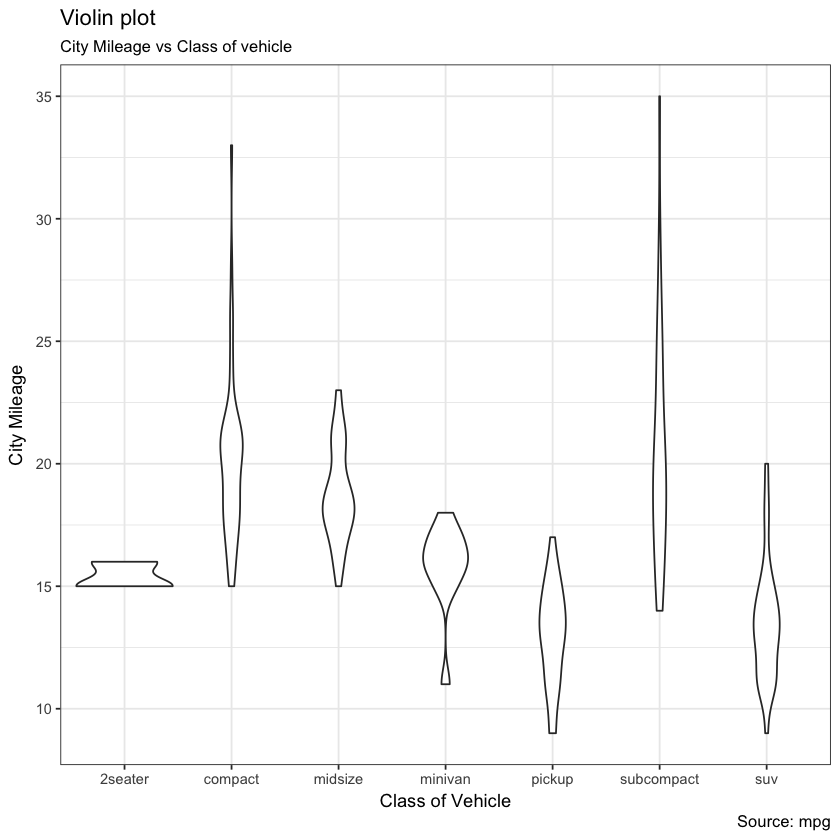

In [6]:
library(ggplot2)
theme_set(theme_bw())

# plot
g <- ggplot(mpg, aes(class, cty))
g + geom_violin() + 
  labs(title="Violin plot", 
       subtitle="City Mileage vs Class of vehicle",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

# Rule 5: Statistics is the language of data (and you can say some really stupid things with it)

Statistics (including machine learning) is the formal description of the relationship between variables. All statistics boil down to a common form:

$$f(X)=Y$$
<br>
This translates from statistics to English as "$Y$ can be described as some function applied to $X$". 

<br>
The nuance of using statistics is known how to talk about the relationship (i.e., $f(.)$). This is where a lot of projects can go wrong. The nature of $X$ and $Y$ determines how you should look at their relationship. Using the wrong test can often give you the wrong impression of $f(X)=Y$. Just because a statistical test gives you a $p<0.05$ does it mean that your test is telling you something meaningful.

<br>
This course is designed to give you the core content knowledge to know how to use the right "data language" for telling the tale of your data.